In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Generate synthetic dataset
def generate_data(n_samples=1000):
    X = np.random.randn(n_samples, 2)  # 100 samples, 2 features
    y = (X[:, 0] + X[:, 1] > 0).astype(float)  # Linear decision boundary
    return X, y

In [3]:
# Create dataset
X, y = generate_data(1000)

In [4]:
X.shape

(1000, 2)

In [5]:
y.shape

(1000,)

#without momentum

In [7]:
model = Sequential()
model.add(Dense(10, activation="relu", input_dim=2))  # Input layer + 1st hidden layer
model.add(Dense(10, activation="relu"))              # 2nd hidden layer
model.add(Dense(10, activation="relu"))              # 3rd hidden layer
model.add(Dense(10, activation="relu"))              # 4th hidden layer
model.add(Dense(1, activation="sigmoid"))            # Output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer=SGD(learning_rate=0.01,momentum=0.0),loss="binary_crossentropy",metrics=["accuracy"])

In [11]:
history= model.fit(X,y,epochs=100,batch_size=10,verbose=0)

#with momentum

In [15]:
model2 = Sequential()
model2.add(Dense(10, activation="relu", input_dim=2))  # Input layer + 1st hidden layer
model2.add(Dense(10, activation="relu"))              # 2nd hidden layer
model2.add(Dense(10, activation="relu"))              # 3rd hidden layer
model2.add(Dense(10, activation="relu"))              # 4th hidden layer
model2.add(Dense(1, activation="sigmoid"))            # Output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model2.compile(optimizer=SGD(learning_rate=0.01,momentum=0.9),loss="binary_crossentropy",metrics=["accuracy"])

In [17]:
history2= model.fit(X,y,epochs=100,batch_size=10,verbose=0)

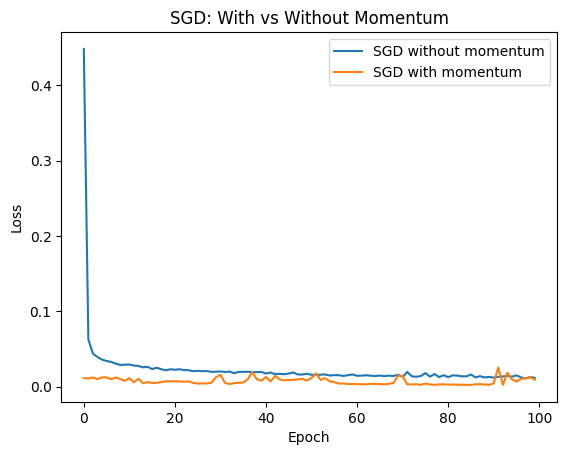

In [20]:
plt.plot(history.history['loss'], label='SGD without momentum')
plt.plot(history2.history['loss'], label='SGD with momentum')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('SGD: With vs Without Momentum')
plt.legend()
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


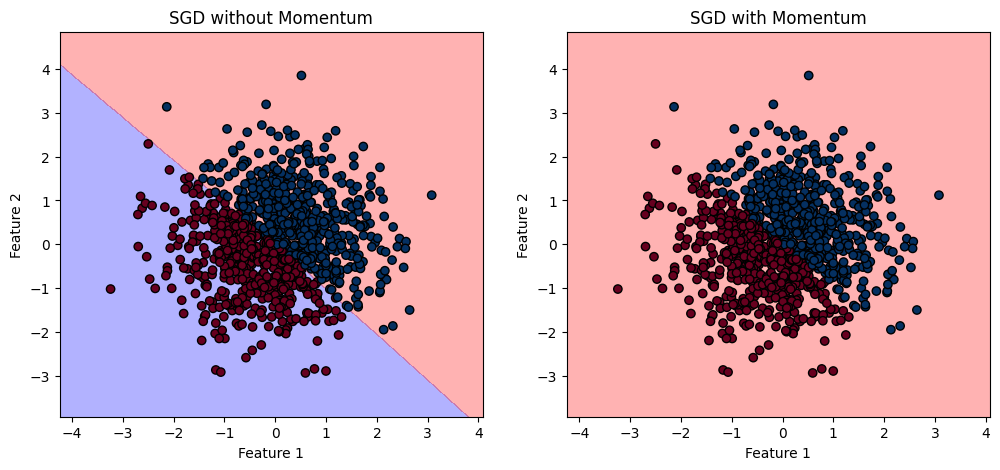

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Create a meshgrid of points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Flatten the grid and make predictions
grid = np.c_[xx.ravel(), yy.ravel()]

# Predictions for both models
Z1 = model.predict(grid)
Z2 = model2.predict(grid)

# Reshape to match the grid
Z1 = Z1.reshape(xx.shape)
Z2 = Z2.reshape(xx.shape)

# Plot contour for SGD without momentum
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z1, levels=[0, 0.5, 1], alpha=0.3, colors=['blue','red'])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdBu)
plt.title('SGD without Momentum')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot contour for SGD with momentum
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z2, levels=[0, 0.5, 1], alpha=0.3, colors=['blue','red'])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdBu)
plt.title('SGD with Momentum')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Calculating loss landscape...


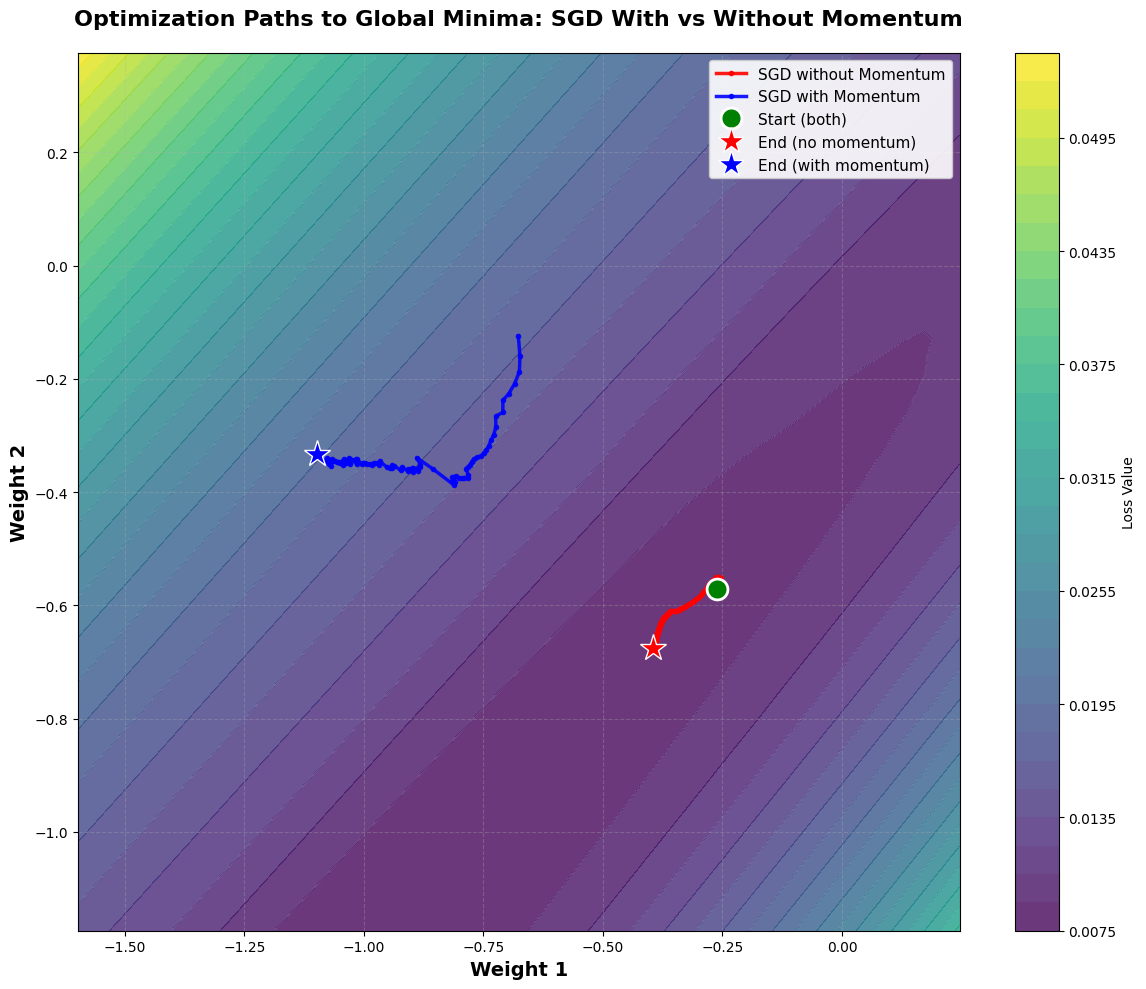


Path Statistics:
Without Momentum - Path length: 100 steps
With Momentum - Path length: 100 steps

Final Loss:
Without Momentum: 0.008423
With Momentum: 0.020259


In [24]:
# First, retrain models with weight tracking
tf.random.set_seed(42)
np.random.seed(42)

# Callback to track weights during training
class WeightTracker(tf.keras.callbacks.Callback):
    def __init__(self):
        self.weights_history = []

    def on_epoch_end(self, epoch, logs=None):
        # Track first two weights from first layer
        w = self.model.layers[0].get_weights()[0]
        self.weights_history.append([w[0, 0], w[1, 0]])

# Retrain WITHOUT momentum with tracking
tracker1 = WeightTracker()
model = Sequential()
model.add(Dense(10, activation="relu", input_dim=2))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.0),
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(X, y, epochs=100, batch_size=10, verbose=0, callbacks=[tracker1])

# Retrain WITH momentum with tracking
tracker2 = WeightTracker()
model2 = Sequential()
model2.add(Dense(10, activation="relu", input_dim=2))
model2.add(Dense(10, activation="relu"))
model2.add(Dense(10, activation="relu"))
model2.add(Dense(10, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))
model2.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
               loss="binary_crossentropy",
               metrics=["accuracy"])
history2 = model2.fit(X, y, epochs=100, batch_size=10, verbose=0, callbacks=[tracker2])

# Convert paths to arrays
path1 = np.array(tracker1.weights_history)
path2 = np.array(tracker2.weights_history)

# Create loss landscape around the paths
w1_min = min(path1[:, 0].min(), path2[:, 0].min()) - 0.5
w1_max = max(path1[:, 0].max(), path2[:, 0].max()) + 0.5
w2_min = min(path1[:, 1].min(), path2[:, 1].min()) - 0.5
w2_max = max(path1[:, 1].max(), path2[:, 1].max()) + 0.5

w1_range = np.linspace(w1_min, w1_max, 50)
w2_range = np.linspace(w2_min, w2_max, 50)
W1, W2 = np.meshgrid(w1_range, w2_range)

# Calculate loss landscape
Z = np.zeros_like(W1)
original_weights = model.layers[0].get_weights()

print("Calculating loss landscape...")
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        new_weights = [original_weights[0].copy(), original_weights[1].copy()]
        new_weights[0][0, 0] = W1[i, j]
        new_weights[0][1, 0] = W2[i, j]
        model.layers[0].set_weights(new_weights)
        Z[i, j] = model.evaluate(X, y, verbose=0)[0]

model.layers[0].set_weights(original_weights)

# Create the contour plot with both paths
plt.figure(figsize=(12, 10))

# Plot filled contours for loss landscape
contour = plt.contourf(W1, W2, Z, levels=30, cmap='viridis', alpha=0.8)
plt.contour(W1, W2, Z, levels=15, colors='white', alpha=0.3, linewidths=0.5)

# Plot optimization path WITHOUT momentum
plt.plot(path1[:, 0], path1[:, 1], 'r.-', linewidth=2.5, markersize=6,
         alpha=0.9, label='SGD without Momentum', zorder=5)

# Plot optimization path WITH momentum
plt.plot(path2[:, 0], path2[:, 1], 'b.-', linewidth=2.5, markersize=6,
         alpha=0.9, label='SGD with Momentum', zorder=5)

# Mark start and end points
plt.plot(path1[0, 0], path1[0, 1], 'go', markersize=15,
         label='Start (both)', zorder=6, markeredgecolor='white', markeredgewidth=2)
plt.plot(path1[-1, 0], path1[-1, 1], 'r*', markersize=20,
         label='End (no momentum)', zorder=6, markeredgecolor='white', markeredgewidth=1)
plt.plot(path2[-1, 0], path2[-1, 1], 'b*', markersize=20,
         label='End (with momentum)', zorder=6, markeredgecolor='white', markeredgewidth=1)

plt.xlabel('Weight 1', fontsize=14, fontweight='bold')
plt.ylabel('Weight 2', fontsize=14, fontweight='bold')
plt.title('Optimization Paths to Global Minima: SGD With vs Without Momentum',
          fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='best', framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')
plt.colorbar(contour, label='Loss Value')

plt.tight_layout()
plt.show()

# Print path statistics
print(f"\nPath Statistics:")
print(f"Without Momentum - Path length: {len(path1)} steps")
print(f"With Momentum - Path length: {len(path2)} steps")
print(f"\nFinal Loss:")
print(f"Without Momentum: {history.history['loss'][-1]:.6f}")
print(f"With Momentum: {history2.history['loss'][-1]:.6f}")